In [36]:
import sklearn
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

from src.models.train_model import CrossValidate
from src.models.metrics import Measure

import warnings

warnings.filterwarnings("ignore")


Leaf Classification

In [37]:
data_dir_path = '../data/external'
data = pd.read_csv(data_dir_path + "/train.csv")

## Pre-traitement des données
### Separer les classes de features
`y_train` = classes or label
`x_train` = features

In [38]:
data.head(10)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.00000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.00000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.00000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.00000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.031250
5,8,Magnolia_Salicifolia,0.070312,0.093750,0.033203,0.001953,0.000000,0.152340,0.007812,0.0,...,0.145510,0.000000,0.041992,0.000000,0.005859,0.00000,0.000000,0.000000,0.001953,0.013672
6,10,Quercus_Canariensis,0.021484,0.031250,0.017578,0.009766,0.001953,0.042969,0.039062,0.0,...,0.085938,0.000000,0.040039,0.000000,0.009766,0.00000,0.000000,0.000000,0.039062,0.003906
7,11,Quercus_Rubra,0.000000,0.000000,0.037109,0.050781,0.003906,0.000000,0.003906,0.0,...,0.038086,0.025391,0.009766,0.002930,0.021484,0.00000,0.037109,0.006836,0.002930,0.036133
8,14,Quercus_Brantii,0.005859,0.001953,0.033203,0.015625,0.001953,0.000000,0.023438,0.0,...,0.000000,0.000000,0.008789,0.000000,0.017578,0.00000,0.000000,0.000977,0.033203,0.074219
9,15,Salix_Fragilis,0.000000,0.000000,0.009766,0.037109,0.072266,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.070312,0.013672,0.19238,0.000000,0.074219,0.000000,0.000000


In [39]:
from src.data.preprocessing_data import LeafDataPreprocessing
processed_data = LeafDataPreprocessing(data=data, normalized=True)


In [40]:
processed_data.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [41]:
classes = processed_data.get_classes()

print("Nombre  de classe : ", classes.shape)

Nombre  de classe :  (99,)


#### Encoder les labels en numérique

In [42]:
t_train = processed_data.y_train
t_train

0       3
1      49
2      65
3      94
4      84
       ..
985    40
986     5
987    11
988    78
989    50
Name: species, Length: 990, dtype: int32

### Mise à l'échelle
La mise à l'échelle des données, ou normalisation, est une étape cruciale en prétraitement des données. le but :


1. **Uniformité**: Elle assure que toutes les caractéristiques numériques contribuent également à l'analyse sans être biaisées par leur échelle d'origine.

2. **Meilleure convergence**: Beaucoup d'algorithmes de machine learning, comme les réseaux de neurones et les méthodes de descente de gradient, convergent plus rapidement lorsque les données sont mises à l'échelle.

3. **Amélioration des performances**: Certains algorithmes, en particulier ceux qui utilisent des mesures de distance comme k-means ou k-NN, ont de meilleures performances si toutes les caractéristiques sont sur une échelle comparable.

4. **Stabilité numérique**: La mise à l'échelle peut aussi aider à éviter des problèmes numériques qui peuvent survenir lorsque les caractéristiques ont des ordres de grandeur très différents.

En somme, la mise à l'échelle des données aide à rendre le processus d'apprentissage automatique plus efficace et plus stable.

In [43]:
d_train = processed_data.x_train

In [44]:
print("Nombre de features  :", d_train.shape)
print("Nombre de classe :", t_train.shape)


Nombre de features  : (990, 192)
Nombre de classe : (990,)


### split data 

In [45]:
x_train,x_test, y_train, y_test = processed_data.split_train_and_test(d_train, t_train, ratio=0.2)
print("x_train shape :", x_train.shape)
print("y_train shape :", y_train.shape)
print("x_test shape :", x_test.shape)
print("y_test shape :", y_test.shape)

x_train shape : (792, 192)
y_train shape : (792,)
x_test shape : (198, 192)
y_test shape : (198,)


In [19]:
### 

## Entrainment avec une méthode gaussienne

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB

# Créer un modèle Naive Bayes gaussien
gnb = GaussianNB()

# Entraîner le modèle sur les données d'entraînement
gnb.fit(x_train, y_train)

# Faire des prédictions sur les données de test
y_pred = gnb.predict(x_test)

# Calculer l'accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculer la precision
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)

# Calculer le recall
recall = recall_score(y_test, y_pred, average='macro',zero_division=1)

# Calculer le F1-score
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.6111111111111112
Precision: 0.8100448933782268
Recall: 0.6111111111111112
F1-score: 0.5720888539070358


Il semble que la methode Gaussienne ne donne pas de bons résultats, nous allons essayer de require les nombre de données aberrantes dans le datasets mais nous passons d'abord autest de normalités 

### Teste d'hypothèse gaussienne des données

In [13]:
from src.data.normality_check import NormalityDistributionCheck
# 'data' est un DataFrame avec la forme (990, 192)
xdata = processed_data.get_processed_data().to_numpy() 
normality_check = NormalityDistributionCheck(data=xdata)

In [14]:
# Test de Shapiro-Wilk pour la normalité
# Ce test est adapté pour les petits échantillons (< 5000)
normality_check.shapiro_wilk_test()


Valeur de la statistique de test (Shapiro-Wilk) : 0.04047077539927135
Valeur-p (p-value) : 3.310562594061702e-201
L'hypothèse de normalité est rejetée.


C:\Users\lordyhas\PycharmProjects\ift712-final-project\src\data\normality_check.py:39: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 192060.
  shapiro_results = stats.shapiro(self.data.flatten())


In [15]:
# Test de Kolmogorov-Smirnov (comparaison avec une distribution normale)
normality_check.kolmogorov_smirnov_test()

Statistique de test (Kolmogorov-Smirnov) : 0.5
Valeur-p (p-value) : 0.0
L'hypothèse de normalité est rejetée.


In [16]:
# Test d'Anderson-Darling (comparaison avec une distribution normale)
normality_check.anderson_darling_test()

Statistique de test (Anderson-Darling) : 72341.24445513345
A un niveau de signification de 15.0%, les données ne semblent pas normales (statistique >= 0.576).
A un niveau de signification de 10.0%, les données ne semblent pas normales (statistique >= 0.656).
A un niveau de signification de 5.0%, les données ne semblent pas normales (statistique >= 0.787).
A un niveau de signification de 2.5%, les données ne semblent pas normales (statistique >= 0.918).
A un niveau de signification de 1.0%, les données ne semblent pas normales (statistique >= 1.092).


Les trois tests de normalité effectuée jusque lá, montre que les données ne semble pas suivre une distribution gaussienne.


### Elimination de donneés aberrantes

### RE-entrainment avec methode gaussienne sur un ensemble avec moins des données aberrantes

In [17]:
# Créer un modèle Naive Bayes gaussien
#gnb = GaussianNB(var_smoothing=0.25)
gnb = GaussianNB()

# Entraîner le modèle sur les données d'entraînement
gnb.fit(x_train, y_train)

# Faire des prédictions sur les données de test
y_pred = gnb.predict(x_test)

# Calculer l'accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculer la precision
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)

# Calculer le recall
recall = recall_score(y_test, y_pred, average='macro',zero_division=1)

# Calculer le F1-score
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.6111111111111112
Precision: 0.8100448933782268
Recall: 0.6111111111111112
F1-score: 0.5720888539070358


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Définir la grille de valeurs pour var_smoothing à rechercher
params = {'var_smoothing': [1e-9, 1e-7, 1e-6, 1e-5, 1e-3, 1e-2]}

# Initialiser le classifieur GaussianNB
gnb = GaussianNB()

# Initialiser GridSearchCV avec le classifieur et la grille de paramètres
grid_search = GridSearchCV(gnb, params, cv=4, scoring='accuracy')

# Effectuer la recherche des meilleurs paramètres en utilisant les données d'entraînement
grid_search.fit(x_train, y_train)

# Afficher les meilleurs paramètres et le meilleur score trouvé
print("Meilleur var_smoothing trouvé:", grid_search.best_params_['var_smoothing'])
print("Meilleur score d'accuracy trouvé:", grid_search.best_score_)

Meilleur var_smoothing trouvé: 0.01
Meilleur score d'accuracy trouvé: 0.9772727272727272


# Entrainement sur des méthodes sans hypothèses


## Experimentation sur Random Forest

### Entrainment du Random Forest normale 
avec ses parametres par défaut,

In [19]:
from sklearn.model_selection import cross_val_score

rfc_model1 = RandomForestClassifier(n_estimators=100, oob_score=True,) #warm_start=True,
rfc_model1.fit(x_train, y_train)

oob_error = rfc_model1.oob_score

#-cross_val_score(rfc_model1, x_train, y_train, cv=5, scoring='neg_log_loss').mean() 


train_score = rfc_model1.score(x_train, y_train)
#test_score = best_rfc_model.score(x_test,)
print("=== Random Forest Scores ==== ")
print("Train Score: \nAccuracy :", train_score)
print("Train Loss :", oob_error)


y_pred = rfc_model1.predict(x_test)

#loss = -CrossValidate.cv_score(rfc_model1, x_test, y_test, scoring='neg_log_loss').mean() 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro',  zero_division=1)
recall = recall_score(y_test, y_pred, average='macro',  zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro',  zero_division=1)

print("\nTest Score :",)
print(f"Accuracy : {accuracy}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"F1-score : {f1}")


=== Random Forest Scores ==== 
Train Score: 
Accuracy : 1.0
Train Loss : True

Test Score :
Accuracy : 0.9848484848484849
Precision : 0.9882154882154882
Recall : 0.9848484848484849
F1-score : 0.9841750841750843


#### Mesure de la performance sur les nombres d'arbres différents

In [26]:
from src.features.utils import find_best_split

find_best_split(x_train.shape[0], 5)

(6, [1, 2, 3, 4, 6])

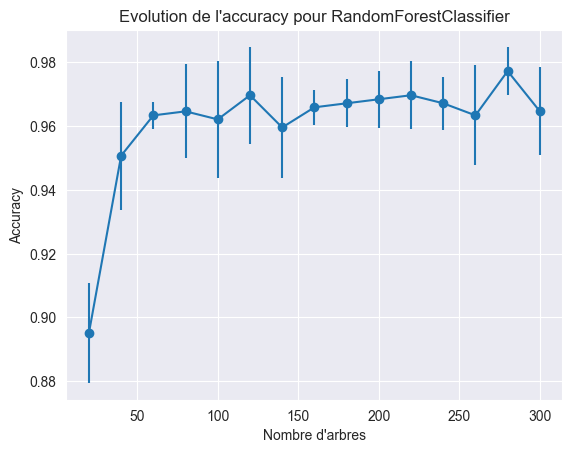

In [28]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# Effectuer la validation croisée stratifiée avec différentes valeurs pour le nombre d'arbres
min_trees = 20
max_trees = 300
num_trees = list(range(min_trees, max_trees+1, 20))
mean_accuracy = []
std_accuracy = []

# Créer un objet StratifiedKFold
n_splits, _ = find_best_split(x_train.shape[0], 5)
#skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Boucle sur chaque nombre d'arbres à tester
for n_trees in num_trees:
    rf_clf = RandomForestClassifier(n_estimators=n_trees)
    
    # Utiliser la validation croisée stratifiée
    scores = CrossValidate.cv_score(rf_clf, x_train, y_train, scoring='accuracy')
    
    # Calculer la moyenne et l'écart type des scores d'accuracy
    mean_accuracy.append(np.mean(scores))
    std_accuracy.append(np.std(scores))

# Afficher la courbe de l'accuracy en fonction du nombre d'arbres
plt.errorbar(num_trees, mean_accuracy, yerr=std_accuracy, fmt='-o')
plt.title('Evolution de l\'accuracy pour RandomForestClassifier')
plt.xlabel('Nombre d\'arbres')
plt.ylabel('Accuracy')
plt.show()


Plus nous augmentons les nombres d'arbre plus la precision augmente

### Mesure de l'erreur sur les nombres d'arbres différents

Experimentation sur trois arbres différents

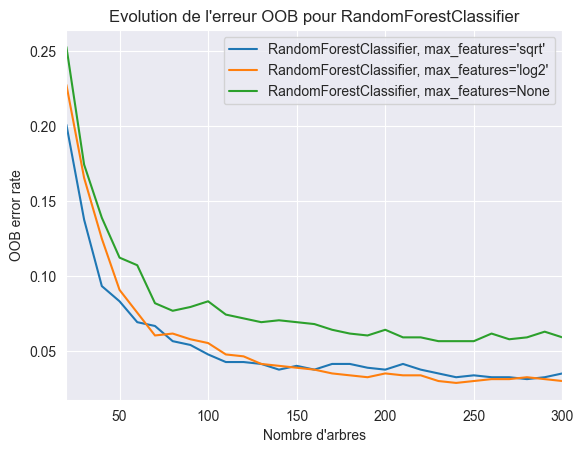

In [20]:
from collections import OrderedDict

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 42

# REMARQUE : définir le paramètre de construction `warm_start` sur `True` désactive la prise en charge des ensembles parallélisés mais est nécessaire pour suivre la trajectoire des erreurs OOB pendant la formation.

# Chaque arbre à un nombre de caractéristiques différent [max_features] à considérer lors de la recherche de la meilleure division pour chaque nœud de l’arbre.
ensemble_rf_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]

# Mappez un nom de classificateur à une liste de paires (<n_estimators>, <error rate>).
error_rate = OrderedDict((label, []) for label, _ in ensemble_rf_clfs)

# Plage de valeurs `n_estimators` à explorer.
min_estimators = 20
max_estimators = 300


for label, clf in ensemble_rf_clfs:
    for i in range(min_estimators, max_estimators + 1, 10):
        clf.set_params(n_estimators=i)
        clf.fit(x_train, y_train)

        # Enregistrez l'erreur OOB pour chaque paramètre `n_estimators=i`.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Générez le tracé « Taux d'erreur OOB » par rapport aux « n_estimators ».
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
    
plt.title('Evolution de l\'erreur OOB pour RandomForestClassifier')
plt.xlim(min_estimators, max_estimators)
plt.xlabel("Nombre d\'arbres")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc, f1_score

# Entraîner le modèle RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

# Faire des prédictions sur les données de test
y_pred_proba = clf.predict_proba(y_train)

# Calculer le ROC curve et l'Area Under the Curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

# Afficher le ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# F1 score
y_pred = clf.predict(x_test)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


### Random Forest : La recherche de meilleurs d'hyperparamètres

In [31]:

# Définir les hyperparamètres à rechercher
rfc_param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion':["gini", "entropy", "log_loss"]
}

# Créer une instance du modèle Random Forest
rfc_model = RandomForestClassifier()

# Effectuer une recherche des hyperparamètres avec validation croisée
rfc_cross_val = CrossValidate(model=rfc_model, params=rfc_param_grid, k_fold=4, metric='accuracy')
rfc_cross_val.train(x_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Ramdom Forest Meilleurs hyperparamètres :", rfc_cross_val.best_params)

# Entraîner le modèle avec les meilleurs hyperparamètres trouvés
best_ = rfc_cross_val.best_params
best_rfc_model = rfc_cross_val.best_model
best_rfc_model.fit(x_train, y_train)

Ramdom Forest Meilleurs hyperparamètres : {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestClassifier()

In [32]:
train_score = best_rfc_model.score(x_train, y_train)
#test_score = best_rfc_model.score(x_test,)
print("=== Random Forest Scores ==== ")
print("Train Score: \nAccuracy :", train_score)


y_pred = best_rfc_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("\nTest Score :",)
print(f"Accuracy : {accuracy}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"F1-score : {f1}")

=== Random Forest Scores ====  1.0
Train Score: 
Accuracy : 1.0

Test Score :
Accuracy : 0.9797979797979798
Precision : 0.9803921568627451
Recall : 0.9852941176470589
F1-score : 0.9784262796027501


In [ ]:
### Random Forest avec reduction de dimension PCA 

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Meilleurs hyperparamètres : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100, 'criterion':"gini"} utilisé


    
# Création d'un pipeline avec standardisation, PCA et classification
pipeline = Pipeline([
    #('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    # avec les meilleurs hyperparametres trouvées
    ('classifier', RandomForestClassifier(n_estimators=100, min_samples_split=2, criterion="gini"))
])
    
# Entraînement du modèle
pipeline.fit(x_train, y_train)

    

train_loss = -cross_val_score(pipeline, x_train, y_train, cv=5, scoring='neg_log_loss').mean() 

# Prédictions sur les données de test
train_score = best_rfc_model.score(x_train, y_train)
#test_score = best_rfc_model.score(x_test,)
print("=== Random Forest Scores ==== ", train_score)
print("Train Score: \nAccuracy :", train_score)
print("Train Loss :", train_loss)

# Prédictions sur les données de test
y_pred = pipeline.predict(x_test)

# Calculer et imprimer les différentes métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

loss = -cross_val_score(pipeline, x_test, y_test, cv=5, scoring='neg_log_loss').mean() 
print("\nTest Score :",) 
print("Test Loss :", train_loss)
print(f"Accuracy : {accuracy}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"F1-score : {f1}")



C:\Users\lordyhas\PycharmProjects\ift712-final-project\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\lordyhas\PycharmProjects\ift712-final-project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\lordyhas\PycharmProjects\ift712-final-project\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lordyhas\PycharmProjects\ift712-final-project\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\lordyhas\PycharmProjects\ift712-final-project\.ve

NameError: name 'best_rfc_model' is not defined

## Support Vector Machine

Implementation naïve de SVM

In [55]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(x_train, y_train)

metrics = Measure(svc_model,x_train,y_train, x_test, y_test)
metrics.show_metrics_train()
metrics.show_metrics_test()


Train Score:
Accuracy : 0.9974747474747475
Precision : 0.9977553310886643
Recall : 0.9974747474747475
F1-score : 0.997464844523668

Test Score :
Accuracy : 0.9797979797979798
Precision : 0.9865319865319865
Recall : 0.9797979797979798
F1-score : 0.9784511784511786


La recherche d'hyperparametre pour le SVM

In [56]:
param_grid_svm = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'degree': np.arange(0, 11)
}
svc_model = SVC()

svm_cross_val = CrossValidate(model=svc_model, params=param_grid_svm, k_fold=4, metric='accuracy')
svm_cross_val.train(x_train, y_train)


# Entraîner le modèle avec les meilleurs hyperparamètres trouvés
best_hp = svm_cross_val.best_params
best_lr_model = svm_cross_val.best_model
# Afficher les meilleurs hyperparamètres trouvés
print("SVM Meilleurs hyperparamètres :", best_hp)
metrics = Measure(best_lr_model,x_train,y_train, x_test, y_test)
metrics.show_metrics_train()
metrics.show_metrics_test()

SGD Meilleurs hyperparamètres : {'C': 0.1, 'degree': 1, 'gamma': 10, 'kernel': 'poly'}

Train Score:
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1-score : 1.0

Test Score :
Accuracy : 0.98989898989899
Precision : 0.9932659932659934
Recall : 0.98989898989899
F1-score : 0.9892255892255892


## Stochastic Gradient Descent

Implementation naïve de SGD

In [46]:
from sklearn.linear_model import SGDClassifier


sgdc_model = SGDClassifier()
sgdc_model.fit(x_train, y_train)

metrics = Measure(sgdc_model,x_train,y_train, x_test, y_test)
metrics.show_metrics_train()
metrics.show_metrics_test()


Train Score:
Accuracy : 0.9924242424242424
Precision : 0.9938781756963575
Recall : 0.9924242424242424
F1-score : 0.9922713681227613

Test Score :
Accuracy : 0.9242424242424242
Precision : 0.9282828282828284
Recall : 0.9242424242424242
F1-score : 0.9128427128427128


#### La recherche d'hyperparametre pour la SGD

In [47]:
param_grid_sgdc = {
    'loss': ['hinge', 'perceptron', 'log_loss', 'log'],
    'penalty': ['l1', 'l2'],
    'alpha': [1e-4, 1.e-3, 1e-2, 1.e-1 , 1],  
}
sgdc_model = SGDClassifier()
sgd_cross_val = CrossValidate(model=sgdc_model, params=param_grid_sgdc, k_fold=4, metric='accuracy')
sgd_cross_val.train(x_train, y_train)

# Entraîner le modèle avec les meilleurs hyperparamètres trouvés
best_hp = sgd_cross_val.best_params
best_lr_model = sgd_cross_val.best_model
# Afficher les meilleurs hyperparamètres trouvés
print("SGD Meilleurs hyperparamètres :", best_hp)
metrics = Measure(best_lr_model,x_train,y_train, x_test, y_test)
metrics.show_metrics_train()
metrics.show_metrics_test()

SGD Meilleurs hyperparamètres : {'alpha': 0.0001, 'loss': 'log_loss', 'penalty': 'l2'}

Train Score:
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1-score : 1.0

Test Score :
Accuracy : 0.9797979797979798
Precision : 0.9865319865319866
Recall : 0.9797979797979798
F1-score : 0.9784511784511786


 De la même manière qu'avec le modèle précédent, une amélioration nette et plus conséquente des performances est observée après la recherche d'hyperparamètres toujours du point de vue de la métrique de justesse(accuracy) 
 
La particularité de ce modèle(SGDC) est qu'il effectue un apprentissage itératif et mets à jour les paramètre au fur et à mesure de l,entrainement. D'où l'intérêt d'observer la convergence progressive de notre modèle.

In [53]:
from sklearn.metrics import accuracy_score, log_loss

model_sgdc = SGDClassifier(alpha=0.0001, loss='log_loss', penalty='l2')

losses_train = []     # Liste pour stocker les valeurs de la perte sur les données d'entraînement
accuracies_train = []  # Liste pour stocker les valeurs de l'accuracy sur les données d'entraînement
losses_val = []       # Liste pour stocker les valeurs de la perte sur les données de validation
accuracies_val = []   # Liste pour stocker les valeurs de l'accuracy sur les données de validation



batch_size = 32
nbr_epoch = int(len(x_train) / batch_size) + 1
train_batches = np.array_split(x_train, nbr_epoch)
target_batches = np.array_split(y_train, nbr_epoch)
max_iter = 15

for i in range(max_iter):
    for epoch in range(nbr_epoch):
        model_sgdc.partial_fit(train_batches[epoch], target_batches[epoch], classes=np.unique(y_train))
        
    # Calcul de la perte et de l'accuracy sur les données d'entraînement
    y_train_prob = model_sgdc.predict_proba(x_train)
    loss_train = log_loss(y_train, y_train_prob)
    y_pred_train = model_sgdc.predict(x_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    # Calcul de la perte et de l'accuracy sur les données de validation
    y_val_prob = model_sgdc.predict_proba(x_test)
    loss_val = log_loss(y_test, y_val_prob)
    y_pred_val = model_sgdc.predict(x_test)
    accuracy_val = accuracy_score(y_test, y_pred_val)
        
    # Stockage des valeurs
    losses_train.append(loss_train)
    accuracies_train.append(accuracy_train)
    losses_val.append(loss_val)
    accuracies_val.append(accuracy_val)
    print('Itération n°',i+1,': =============> acc train:', accuracy_train, 'loss train:', loss_train,' ¦¦ acc_test: ', accuracy_val, 'loss tess: ', loss_val)

Itération n° 1 : =============> acc train: 0.5138888888888888 loss train: 6.952878634921156  ¦¦ acc_test:  0.46464646464646464 loss tess:  8.139140490446367
Itération n° 2 : =============> acc train: 0.8169191919191919 loss train: 1.2815004233975777  ¦¦ acc_test:  0.7525252525252525 loss tess:  1.9032165122452116
Itération n° 3 : =============> acc train: 0.9166666666666666 loss train: 0.8098970453443217  ¦¦ acc_test:  0.8585858585858586 loss tess:  1.0736114697181285
Itération n° 4 : =============> acc train: 0.9242424242424242 loss train: 0.6257897344054  ¦¦ acc_test:  0.8434343434343434 loss tess:  0.9263479598554645
Itération n° 5 : =============> acc train: 0.9633838383838383 loss train: 0.38216439986620077  ¦¦ acc_test:  0.9292929292929293 loss tess:  0.6014074082476009
Itération n° 6 : =============> acc train: 0.9823232323232324 loss train: 0.12218386784211584  ¦¦ acc_test:  0.9494949494949495 loss tess:  0.3204403634618911
Itération n° 7 : =============> acc train: 0.992424242

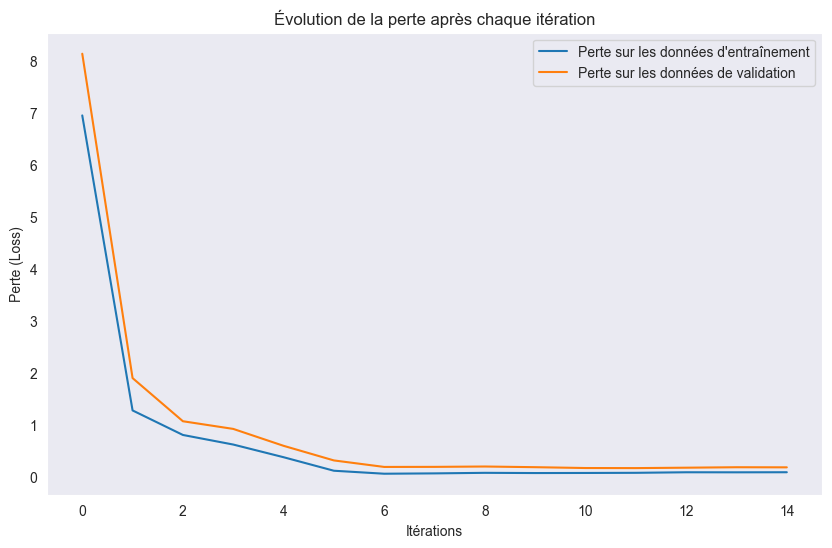

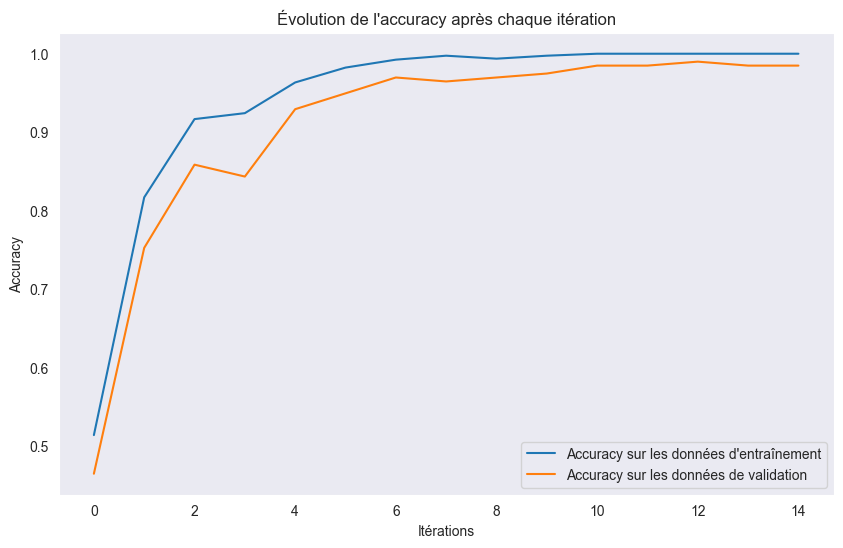

In [54]:
steps = range(max_iter)

plt.figure(figsize=(10, 6))
plt.plot(steps, losses_train, label='Perte sur les données d\'entraînement')
plt.plot(steps, losses_val, label='Perte sur les données de validation')
plt.xlabel('Itérations')
plt.ylabel('Perte (Loss)')
plt.title('Évolution de la perte après chaque itération')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(steps, accuracies_train, label='Accuracy sur les données d\'entraînement')
plt.plot(steps, accuracies_val, label='Accuracy sur les données de validation')
plt.xlabel('Itérations')
plt.ylabel('Accuracy')
plt.title('Évolution de l\'accuracy après chaque itération')
plt.legend()
plt.grid()
plt.show()

## Entrainement Logistic Regression

Implementation naïve de Logistic Regression

In [20]:
from src.models.metrics import Measure
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

print("Logistic Regression Meilleurs hyperparamètres :", lr_model.score(x_train,y_train))

metrics = Measure(lr_model,x_train,y_train, x_test, y_test)
metrics.show_metrics_train()
metrics.show_metrics_test()

Logistic Regression Meilleurs hyperparamètres : 0.9987373737373737

Train Score:
Accuracy : 0.9987373737373737
Precision : 0.9988776655443322
Recall : 0.9987373737373737
F1-score : 0.998732422261834

Test Score :
Accuracy : 0.98989898989899
Precision : 0.9932659932659934
Recall : 0.98989898989899
F1-score : 0.9892255892255892


#### La recherche d'hyperparametre pour la logistic regression

In [24]:


lr_param_grid = {
    'solver': ['lbfgs', 'liblinear', 'newton-cholesky'],
    'C': np.linspace(-1, 3, 7),
    'penalty' : ['l1', 'l2', 'elasticnet', None],
}

lr_model = LogisticRegression(random_state=42)

lr_cross_val = CrossValidate(model=lr_model, params=lr_param_grid, k_fold=4, metric='accuracy')
lr_cross_val.train(x_train, y_train)


# Entraîner le modèle avec les meilleurs hyperparamètres trouvés
best_hp = lr_cross_val.best_params
best_lr_model = lr_cross_val.best_model
# Afficher les meilleurs hyperparamètres trouvés
print("Logistic Regression Meilleurs hyperparamètres :", best_hp)
metrics = Measure(best_lr_model,x_train,y_train, x_test, y_test)
metrics.show_metrics_train()
metrics.show_metrics_test()


C:\Users\lordyhas\PycharmProjects\ift712-final-project\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\lordyhas\PycharmProjects\ift712-final-project\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\lordyhas\PycharmProjects\ift712-final-project\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\lordyhas\PycharmProjects\ift712-final-project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\lordyhas\PycharmProjects\ift712-final-project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalt

KeyboardInterrupt: 

## Entrainement MLP

Implementation naïve de MLP

In [60]:
from sklearn.neural_network import MLPClassifier


mlp_model = MLPClassifier()
mlp_model.fit(x_train, y_train)
print(f"Meilleurs loss {mlp_model.best_loss_}")
metrics = Measure(mlp_model,x_train,y_train, x_test, y_test)
metrics.show_metrics_train()
metrics.show_metrics_test()

Meilleurs loss 0.03079088646628271 


Train Score:
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1-score : 1.0

Test Score :
Accuracy : 0.9797979797979798
Precision : 0.9865319865319865
Recall : 0.9797979797979798
F1-score : 0.9784511784511786


Avec l'implementation naïve de MLP il faut plus de 5000 iterations pour converger, 

#### La recherche d'hyperparametre

array([1.0000e-05, 2.5075e-03, 5.0050e-03, 7.5025e-03, 1.0000e-02])

In [ ]:
from src.models.train_model import CrossValidate
from sklearn.neural_network import MLPClassifier

# Définir les hyperparamètres à rechercher
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 100)],
    'activation': ['relu', 'tanh','softmax', 'elu', 'selu'],
    # Différentes valeurs pour alpha pour tester la régularisation L2
    'alpha': np.linspace(1e-5, 0.01, 7), #[0.0001, 0.001, 0.01] ,
    'early_stopping': [True],
    'n_iter_no_change': [5, 10, 20]
}


# Créer une instance du modèle MLP
mpl_model = MLPClassifier()

# Effectuer une recherche des hyperparamètres avec validation croisée
grid_search = CrossValidate(model=mpl_model, params=param_grid, k_fold=5, metric='accuracy')
grid_search.train(x_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("MLP Meilleurs hyperparamètres :", grid_search.best_params)

# Entraîner le modèle avec les meilleurs hyperparamètres trouvés
best_mlp_model = grid_search.best_model
metrics = Measure(best_mlp_model,x_train,y_train, x_test, y_test)
metrics.show_metrics_train()
metrics.show_metrics_test()


In [48]:
print("MLP Meilleurs hyperparamètres :", grid_search.best_params)

MLP Meilleurs hyperparamètres : {'activation': 'relu', 'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (100,), 'n_iter_no_change': 20, 'tol': 0.001}


In [46]:
print("MLP Meilleurs hyperparamètres :", grid_search.best_params)

MLP Meilleurs hyperparamètres : {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,)}


In [49]:
train_score = best_mlp_model.score(x_train, y_train)
#test_score = best_rfc_model.score(x_test,)
print("MLP Train Accuracy :", train_score)

MLP Train Accuracy : 0.9878787878787879


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

# Prédictions sur les données de test
y_pred = best_mlp_model.predict(x_test)
y_pred_proba = best_mlp_model.predict_proba(x_test)  # Probabilités prédites pour log_loss

# Calculer et imprimer les différentes métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Calculer la perte (loss)
loss = log_loss(y_test, y_pred_proba)

print(f"Accuracy : {accuracy}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"F1-score : {f1}")
print(f"Log Loss : {loss}")



Loss curve

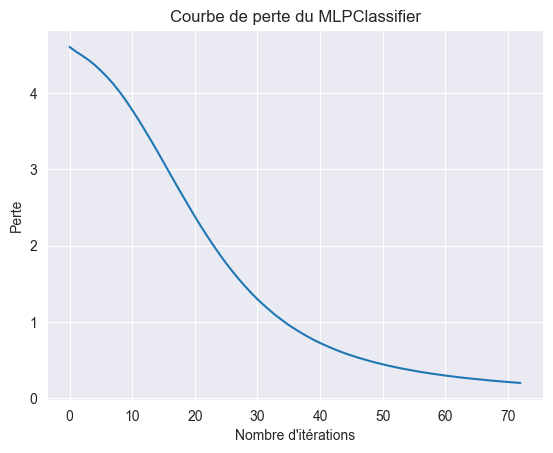

In [52]:
plt.plot(best_mlp_model.loss_curve_)
plt.title('Courbe de perte du MLPClassifier')
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Perte')
plt.show()

Accuracy curve

Iteration 1, loss = 4.59801173
Validation score: 0.030303
Iteration 2, loss = 4.52403924
Validation score: 0.040404
Iteration 3, loss = 4.45890087
Validation score: 0.070707
Iteration 4, loss = 4.38605485
Validation score: 0.070707
Iteration 5, loss = 4.30995631
Validation score: 0.060606
Iteration 6, loss = 4.22711854
Validation score: 0.080808
Iteration 7, loss = 4.13508900
Validation score: 0.121212
Iteration 8, loss = 4.03659586
Validation score: 0.141414
Iteration 9, loss = 3.92744151
Validation score: 0.141414
Iteration 10, loss = 3.81293093
Validation score: 0.141414
Iteration 11, loss = 3.69214488
Validation score: 0.161616
Iteration 12, loss = 3.56616972
Validation score: 0.232323
Iteration 13, loss = 3.43310574
Validation score: 0.292929
Iteration 14, loss = 3.29695603
Validation score: 0.363636
Iteration 15, loss = 3.15763186
Validation score: 0.393939
Iteration 16, loss = 3.01655021
Validation score: 0.474747
Iteration 17, loss = 2.87525397
Validation score: 0.505051
Iterat

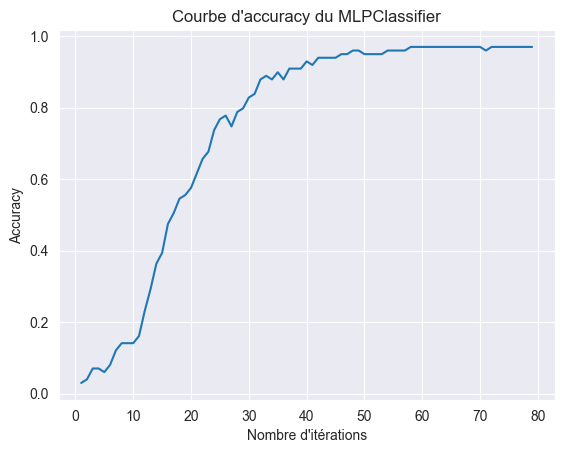

In [54]:

# Récupérer l'accuracy à chaque itération
train_accuracy = best_mlp_model.validation_scores_

# Afficher la courbe d'accuracy
plt.plot(np.arange(1, len(train_accuracy) + 1), train_accuracy)
plt.title('Courbe d\'accuracy du MLPClassifier')
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Accuracy')
plt.show()

##

### Résultats

Résultats :

| Model | Best Parameter | Accuracy Train Score | Accuracy Train Score |
--------|----------------|----------------------|----------------------|
| Random Forest |  | 100% | |
| MLP |  | 100% | |


- Random Forest  Meilleurs hyperparamètres : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
- MLP Meilleurs hyperparamètres : {'activation': 'relu', 'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (100,), 'n_iter_no_change': 20, 'tol': 0.001}
- 

============================================================================

# Reduction de dimension avec PCA

 Comme on pu le remarrquer plus haut, la trop frande quantité d'attribut empeche une visualisation correcte des données.
Nous allons tenter de réduits la dimension de nos données et voir l'influence sur les performances de nos modèles.

Comment allons nous décider du nombre de composantes environs à utiliser? Un bon indice peut être obtenu via une ACP.

In [58]:
import plotly.graph_objects as go
import numpy as np
from sklearn.decomposition import PCA

X_acp = x_train
pca = PCA().fit(X_acp)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=list(range(1, len(cumulative_variance_ratio) + 1)),  # Conversion en liste
    y=cumulative_variance_ratio,
    mode='lines+markers',
    marker=dict(symbol='circle', size=8),
    line=dict(dash='dash'),
))

fig.update_layout(
    xaxis_title='Nombre de composants',
    yaxis_title='Ratio de variance expliquée cumulée',
    title='Ratio de variance expliquée cumulée par nombre de composantes',
)

fig.show()

pca3 = PCA(n_components=95)
X_pca3 = pca3.fit_transform(processed_data.get_processed_data())

X_pca3

"""df_pca3 = pd.DataFrame(X_pca3, columns=['PC1', 'PC2', 'PC3'])
df_pca3['species']= df_train['species'].values
df_pca3.head()"""